## 最小生成树（minimum spanning tree）

### 图（回顾）

* 一个__有向图（directed graph (digraph)）__ $G=(V, E)$
  * $V$是顶点（vertices）的集合
  * $E$是 $E \subseteq V \times V$的边的集合，用有序的顶点对表示,如$(v_1,v_2)$就表示顶点$v_1$指向$v_2$的一条边（是有方向的），其中$\times$表示笛卡尔乘积

* 一个__无向图（undirected graph）__ $G=(V, E)$边集合$E$是用无序的顶点对表示的，是无方向的。

* 邻接矩阵表示法（Adjacency-matrix representation）
  * 图$G=(V,E)$，$V=\{1, 2, …, n\}$，我们用一个$|V|\times |V|$矩阵$A$来进行图的表示。<br>
$A[i, j]=\left\{
\begin{aligned}
1 && if(i, j)\in E \\
0 && if(i, j)\notin E
\end{aligned}
\right.
$
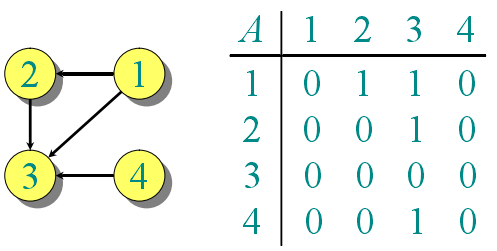

* 邻接表表示法（Adjacency-list representation）
  * 顶点$v \in V$的邻接表是与$v$相邻的顶点的列表$Adj[v]$
  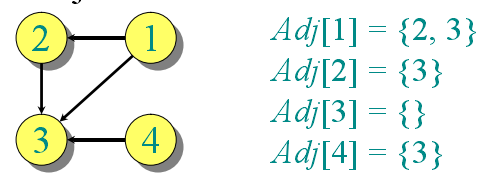
  * 对于无向图，$|Adj[v]| = drgree(v)$，邻接表的长度就是该顶点的度。
  * 对于无向图，$|Adj[v]| = out\_drgree(v)$,邻接表的长度就是该顶点的出度。

* 握手引理（Handshaking Lemma）<br>
  握手引理是关于无向图的。在每个有限的无向图中，奇数度的顶点的个数总是偶数。握手引理是一个度数和公式的推论。
  $\sum_{v \in V} degree(v) = 2|E|$

### 最小生成树（Minimum spanning tree）

* 在一给定连通的无向图 $G = (V, E)$ 中，$(u, v)$ 代表连接顶点 $u$ 与顶点 $v$ 的边，而 $w(u, v)$ 代表此边的权重，若存在 $T$ 为 $E$ 的子集且为无循环图，使得的 $w(T)$ 最小，则此 $T$ 为 $G$ 的最小生成树。<br>
 $w(T) = \sum_{(u,v)\in T} w(w,v)$

* 一个简单的例子图<br>
<img src="mst01.png" style="width:40%;float:left;"/>
<img src="mst02.png"style="width:40%;float:left;"/>

#### 最优子结构（Optimal substructure）

#### prim（普里姆）算法

* 输入：一个加权连通图，其中顶点集合为V，边集合为E；
* 初始化：$A = \{v_0\}$，其中$v_0$为集合$V$中任一顶点（起始点）；
* 重复下面的操作，直到$A = V$；
  1. 在集合$E$中选取权值最小的边$<u, v>$，其中$u$为集合$A$集合当中，并且$v \in V$（如果存在有多条满足前述条件即具有相同权值的边，则可任意选取其中之一）；
  2. 将$v$加入集合$A$中，将$<u, v>$边加入集合加到$E_{new}$中；
* 输出:使用集合$A$和集合$E_{new}$来描述所得到的最小生成树。

In [27]:
V = [0, 1, 2, 3, 4, 5, 6, 7]  # 八个顶点
Adj = []
Adj.append([1, 2])
Adj.append([0, 2, 4, 5])
Adj.append([0, 1, 3, 6])
Adj.append([2])
Adj.append([1, 5])
Adj.append([1, 4, 6])
Adj.append([2, 5, 7])
Adj.append([6])
w = []
w.append([0, 6, 12, 0, 0, 0, 0, 0])
w.append([6, 0, 5, 0, 14, 8, 0, 0])
w.append([12, 5, 0, 9, 0, 0, 7, 0])
w.append([0, 0, 9, 0, 0, 0, 0, 0])
w.append([0, 14, 0, 0, 0, 3, 0, 0])
w.append([0, 8, 0, 0, 3, 0, 10, 0])
w.append([0, 0, 7, 0, 0, 10, 0, 15])
w.append([0, 0, 0, 0, 0, 0, 15, 0])
V

[0, 1, 2, 3, 4, 5, 6, 7]

In [32]:
'''
这是上课讲的算法
'''
# 算法中权值都不相同，不考虑权值相同的情况
def extract_min(Q, key):
    min = key[Q[0]]
    u = Q[0]
    for i in range(len(Q)):
        if min > key[Q[i]]:
            min = key[Q[i]]
            u = Q[i]
    Q.remove(u)
    return u

Q = list(V)
key = [10000000] * len(V)
key[6] = 0
e = list(range(len(V)))
while len(Q) > 0:
    u = extract_min(Q, key)
    for v in Adj[u]:
        if v in Q and w[u][v] < key[v]:
            key[v] = w[u][v]
            e[v] = u
e

[1, 2, 6, 2, 5, 1, 6, 6]

#### kruskal（克鲁斯卡尔）算法